In [3]:
!pip install matplotlib

     |████████████████████████████████| 7.3 MB 3.5 MB/s            
     |████████████████████████████████| 880 kB 3.7 MB/s            
  Using cached kiwisolver-1.3.2-cp38-cp38-macosx_10_9_x86_64.whl (61 kB)
     |████████████████████████████████| 3.0 MB 2.6 MB/s            


In [7]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv("../geotracker/data/lieferando_restaurants_from_api.csv")
data.head()

,restaurant_name,platform,reviews,avg_review_score,street,zip_code,city,latitude,longitude,type_of_cuisine,avg_delivery_time,pricyness,delivery_fee,minimum_order_value
0,Funa Sushi Zehlendorf,lieferando,94,4.7,Brümmerstraße 40,14199,Berlin,52.453214,13.286496,"['sushi_51', 'asian_1864', 'poke-bowl_2318']",40,0,0,990
1,Bowlicious,lieferando,64,4.1,Meerscheidtstr. 4,14199,Berlin,52.509210,13.280169,"['vegetarian_391', 'japanese_551', 'asian_1864']",45,0,0,1500
2,SL Pizza Felice,lieferando,69,3.8,Leipziger Straße 58,14199,Berlin,52.511330,13.397020,"['italian-pizza_271', 'pasta_1614', 'falafel_1...",25,0,150,3500
3,Nampan Restaurant,lieferando,205,4.5,Oranienburger Straße 66,14199,Berlin,52.525028,13.391678,"['sushi_51', 'japanese_551', 'vietnamese_261']",40,0,290,7500
4,Miu Sushi,lieferando,2107,4.8,Eisenacher Straße 80,14199,Berlin,52.488982,13.349936,"['sushi_51', 'asian_1864', 'poke-bowl_2318']",50,1144,0,2000


In [10]:
wolt_clean = pd.read_csv("../geotracker/data/wolt_clean_data.csv")
wolt_clean.head()

,Unnamed: 0,restaurant_name,avg_review_score,minimum_order_value,delivery_fee,pricyness,avg_delivery_time_clean,type_of_cuisine_categorized,street,zip_code,city_name,latitude,longitude,database
0,0,Besh,8.8,10.0,NaN,€,35.0,vegetarian or vegan,Brückenstraße 15,10179,Berlin,52.511595,13.416639,wolt
1,1,Five Rivers,8.8,10.0,NaN,€€,55.0,asian,Albrechtstraße 11,10117,Berlin,52.521463,13.384837,wolt
2,2,Ferrarino Pizza,8.6,10.0,NaN,€€,35.0,italian,Garnisonkirchpl. 2,10178,Berlin,52.521830,13.401740,wolt
3,3,Hito Falafel,9.0,10.0,NaN,€€,35.0,middle eastern,Chauseestraße 4,10115,Berlin,52.527780,13.386926,wolt
4,4,Miu Lunch,NaN,10.0,1.9,€,NaN,asian,Reinhardtstraße 47 A,10117,Berlin,52.522177,13.378188,wolt


In [11]:
# TODO: rename platform variable to database
data.rename(columns={"platform": "database"}, inplace=True)
# TODO: multiply review score by 2 
data.avg_review_score = data.avg_review_score * 2
# TODO: convert minimum order value into euros (from cents)
data.minimum_order_value = data.minimum_order_value / 100
# TODO: convert delivery fee into euros
data.delivery_fee = data.delivery_fee / 100

data.head()

,restaurant_name,database,reviews,avg_review_score,street,zip_code,city,latitude,longitude,type_of_cuisine,avg_delivery_time,pricyness,delivery_fee,minimum_order_value
0,Funa Sushi Zehlendorf,lieferando,94,9.4,Brümmerstraße 40,14199,Berlin,52.453214,13.286496,"['sushi_51', 'asian_1864', 'poke-bowl_2318']",40,0,0.0,9.9
1,Bowlicious,lieferando,64,8.2,Meerscheidtstr. 4,14199,Berlin,52.509210,13.280169,"['vegetarian_391', 'japanese_551', 'asian_1864']",45,0,0.0,15.0
2,SL Pizza Felice,lieferando,69,7.6,Leipziger Straße 58,14199,Berlin,52.511330,13.397020,"['italian-pizza_271', 'pasta_1614', 'falafel_1...",25,0,1.5,35.0
3,Nampan Restaurant,lieferando,205,9.0,Oranienburger Straße 66,14199,Berlin,52.525028,13.391678,"['sushi_51', 'japanese_551', 'vietnamese_261']",40,0,2.9,75.0
4,Miu Sushi,lieferando,2107,9.6,Eisenacher Straße 80,14199,Berlin,52.488982,13.349936,"['sushi_51', 'asian_1864', 'poke-bowl_2318']",50,1144,0.0,20.0


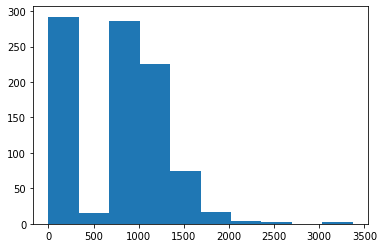

In [13]:
plt.hist(data.pricyness);

In [14]:
data.pricyness.unique()

array([   0, 1144,  972, 1139, 1504,  703, 1111, 1113, 1168,  911,  833,
       1034, 1385, 1670, 1440, 1236,  986,  919, 1192,  686,  979,  898,
        962, 1000, 1544, 1172, 1046, 1368, 1899, 1019, 1390, 1057, 1059,
       1281, 1038,  917,  970, 1251, 1439,  958,  945, 2271, 1050, 1190,
        879, 1313, 1077, 1232, 1327, 1087,  996,  826,  985, 1660, 1412,
        974,  839, 1377,  753,  665,  744, 1224,  882, 1163,  937, 1358,
       1629,  835, 1002, 1330, 1509, 1292, 1016,  780,  850, 1315, 1262,
       1164,  883, 1114,  865, 1185,  874, 1082, 1409, 1165, 1076,  922,
       1255,  991,  990, 1103,  680, 1219,  892,  727, 1206,  740,  976,
       1257,  718,  944,  878,  823, 1200, 1218, 1025, 1098, 1229, 1151,
       1441, 1128,  790,  791,  894,  802,  914,  987,  909, 1143, 1295,
       1080, 1729,  881,  902, 1146, 1045,  719,  886, 1147, 1331,  971,
        932,  988, 1488, 1693, 3233, 1387,  960,  946,  978, 1228, 1041,
       1092, 1664,  866,  954, 1006, 1182, 1304,  8